<a href="https://colab.research.google.com/github/RuvindiDilsara/ML_Feature_Engineering/blob/main/Label_4_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np

In [31]:
#constants
L1 = 'label_1'
L2 = 'label_2'
L3 = 'label_3'
L4 = 'label_4'

LABELS = [L1, L2, L3, L4]
AGE_LABEL = L2
FEATURES = [f"feature_{i}" for i in range (1,257)]

In [32]:
from google.colab import drive
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML/Feature_Engineering"

In [34]:
train = pd.read_csv(f"{WORKING_DIR}/train.csv")
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [35]:
valid = pd.read_csv(f"{WORKING_DIR}/valid.csv")
valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


In [36]:
test = pd.read_csv(f"{WORKING_DIR}/test.csv")
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


Need to balance the L4 by undersampling. SVC - balanced
#clf = svm.SVC(kernel = 'linear', class_weight='balanced')

**Scale** the dataset

In [37]:
from sklearn.preprocessing import StandardScaler

x_train = {}
y_train = {}
x_valid = {}
y_valid = {}
x_test = {}
y_test = {}

for target_label in LABELS:
  tr_df = train[train['label_2'].notna()] if target_label == 'label_2' else train
  vl_df = valid
  test_df = test

  scaler = StandardScaler()
  x_train[target_label] = pd.DataFrame(scaler.fit_transform(tr_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_train[target_label] = tr_df[target_label]

  x_valid[target_label] = pd.DataFrame(scaler.transform(vl_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_valid[target_label] = vl_df[target_label]

  x_test[target_label] = pd.DataFrame(scaler.transform(test_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_test[target_label] = test_df[target_label]

In [38]:
# from sklearn import svm

# clf = svm.SVC(kernel = 'linear', class_weight='balanced')
# clf.fit(x_train[L4], y_train[L4])

from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors=5)
clf = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the PCA-transformed features
clf.fit(x_train[L4], y_train[L4])

KNeighborsClassifier()

In [39]:
from sklearn import metrics

y_pred = clf.predict(x_valid[L4])
y_pred_test = clf.predict(x_test[L4])
print("Predicted labels before feature engineering", y_pred_test)

Predicted labels before feature engineering [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 13 13 13 13 13 13
 13 13  4  4  4  4  4  4  4  4  4  4  4  4  6  4  4  4  6  6  6  6  6  6
  6  6  6  6  6  6  5  5  5  5  5  5  5  5  5  5  5  1  1  1  1  1  1  1
  1  1  1  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  2  2  2  2  2  2  2  2
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7 12  7  7  7  7
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  3  3  3  3  3  3
  3  3  3  3  3  3  3  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6 

In [40]:
print (metrics.confusion_matrix(y_valid[L4], y_pred))
print (metrics.accuracy_score(y_valid[L4], y_pred))
print (metrics.precision_score(y_valid[L4], y_pred, average="weighted"))
print (metrics.recall_score(y_valid[L4], y_pred, average="weighted"))

[[ 21   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  27   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 532   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1  31   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  18   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  17   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0  25   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10]]
0.9946666666666667
0.9947064676616915
0.9946666666666667


## Feature Engineering

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=100)
X_new = selector.fit_transform(x_train[L4], y_train[L4])

print("Shape: ", X_new.shape)

Shape:  (28520, 100)


In [42]:
# clf = svm.SVC(kernel = 'linear', class_weight='balanced')
# clf.fit(X_new, y_train[L4])

In [43]:
# y_pred = clf.predict(selector.transform(x_valid[L4]))
# print (metrics.confusion_matrix(y_valid[L4], y_pred))
# print (metrics.accuracy_score(y_valid[L4], y_pred))
# print (metrics.precision_score(y_valid[L4], y_pred, average="weighted"))
# print (metrics.recall_score(y_valid[L4], y_pred, average="weighted"))

# SelectKBest with PCA

In [44]:
new_selector = SelectKBest(f_classif, k=150)
x_train_sb = new_selector.fit_transform(x_train[L4], y_train[L4])
x_valid_sb = new_selector.transform(x_valid[L4])
x_test_sb = new_selector.transform(x_test[L4])
print("Shape: ", x_train_sb.shape)

Shape:  (28520, 150)


In [45]:
new_pca = PCA(n_components=0.95, svd_solver='full')
new_pca.fit(x_train_sb)
x_train_pca = pd.DataFrame(new_pca.transform(x_train_sb))
x_valid_pca = pd.DataFrame(new_pca.transform(x_valid_sb))
x_test_pca = pd.DataFrame(new_pca.transform(x_test_sb))
print("Shape after PCA: ", x_train_pca.shape)

Shape after PCA:  (28520, 58)


In [46]:
# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors=5)
clf = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the PCA-transformed features
clf.fit(x_train_pca, y_train[L4])

KNeighborsClassifier()

In [47]:
y_pred_sb_pca = clf.predict(x_valid_pca)
y_pred_sb_pca_test = clf.predict(x_test_pca)
print (metrics.confusion_matrix(y_valid[L4], y_pred_sb_pca))
print (metrics.accuracy_score(y_valid[L4], y_pred_sb_pca))
print (metrics.precision_score(y_valid[L4], y_pred_sb_pca, average="weighted"))
print (metrics.recall_score(y_valid[L4], y_pred_sb_pca, average="weighted"))

[[ 21   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  10   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0  27   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0 531   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1  31   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0  17   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  17   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11   0   0]
 [  0   0   0   0   0   0   2   1   0   0   0   0  23   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10]]
0.988
0.9881517082669498
0.988


In [48]:
output_df = pd.DataFrame({
    'Predicted labels before feature engineering': y_pred_test,
    'Predicted labels after feature engineering': y_pred_sb_pca_test,
    'No of new features': x_test_pca.shape[1]
})

for i in range(256):
  if i < x_test_pca.shape[1]:
    output_df[f'new_feature_{i+1}'] = x_test_pca.iloc[:, i]
  else:
    output_df[f'new_feature_{i+1}'] = None

<ipython-input-48-3b4846deda4e>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  output_df[f'new_feature_{i+1}'] = None
<ipython-input-48-3b4846deda4e>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  output_df[f'new_feature_{i+1}'] = None
<ipython-input-48-3b4846deda4e>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newf

In [49]:
output_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_247,new_feature_248,new_feature_249,new_feature_250,new_feature_251,new_feature_252,new_feature_253,new_feature_254,new_feature_255,new_feature_256
0,6,6,58,-4.786264,-1.839315,0.251414,0.450206,1.805831,-4.452690,6.554040,...,None,None,None,None,None,None,None,None,None,None
1,6,6,58,-7.694773,-6.001538,-2.739675,6.902530,4.939664,-4.804998,2.135889,...,None,None,None,None,None,None,None,None,None,None
2,6,6,58,-3.699208,-3.604175,-0.248280,4.892493,1.082076,-0.707701,3.972944,...,None,None,None,None,None,None,None,None,None,None
3,6,6,58,-5.348509,-2.771619,-0.104856,-0.548187,1.320443,-1.205352,0.047477,...,None,None,None,None,None,None,None,None,None,None
4,6,6,58,-5.515191,0.137345,-3.034295,2.357873,2.467443,-1.949345,4.050226,...,None,None,None,None,None,None,None,None,None,None


In [50]:

# Save the DataFrame to the specified CSV file path
output_df.to_csv(f"{WORKING_DIR}/190140L_label_4.csv", index=False)

### Co-relation matrix


In [51]:
corr_matrix = x_train_trf.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,1.000000e+00,-6.329922e-17,2.709544e-16,-2.011217e-16,-1.391114e-16,-6.076175e-16,-7.230957e-17,-5.372022e-16,1.541204e-16,-1.406132e-16,...,2.599030e-16,-3.588213e-17,2.057988e-16,-3.801831e-16,-6.238790e-17,2.770700e-16,-4.833885e-16,-1.941144e-16,-2.678563e-16,2.749054e-16
1,-6.329922e-17,1.000000e+00,3.426158e-16,-1.005793e-17,3.032214e-16,1.194134e-16,2.112194e-16,3.365789e-16,-1.171557e-16,2.735015e-16,...,7.513490e-16,-1.326409e-16,3.382453e-16,1.944346e-16,2.781185e-16,1.958974e-16,2.282778e-16,1.981515e-16,-2.496235e-16,9.797647e-17
2,2.709544e-16,3.426158e-16,1.000000e+00,-9.038516e-17,6.712127e-17,2.174875e-16,3.865110e-17,-6.376282e-16,2.170142e-16,-4.047442e-16,...,3.412187e-16,-2.551417e-16,1.282819e-16,-2.828236e-16,-4.342791e-16,1.988544e-16,9.965089e-17,-4.511155e-17,1.180361e-16,-6.793054e-18
3,-2.011217e-16,-1.005793e-17,-9.038516e-17,1.000000e+00,-1.238529e-16,-9.262355e-16,-4.590542e-16,-4.588263e-16,2.155421e-16,-5.763144e-17,...,3.507702e-16,3.683354e-16,-4.177444e-16,2.392782e-16,3.323763e-16,-2.298078e-16,-1.432864e-16,-3.334715e-16,-4.420732e-16,-7.209132e-17
4,-1.391114e-16,3.032214e-16,6.712127e-17,-1.238529e-16,1.000000e+00,-2.091685e-16,2.816209e-16,-8.568040e-17,-1.277076e-16,-3.872417e-16,...,1.861423e-16,7.564270e-17,4.898993e-17,-2.928269e-16,-1.464595e-16,2.652896e-16,9.263928e-17,4.593605e-17,1.527282e-16,-3.031102e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2.770700e-16,1.958974e-16,1.988544e-16,-2.298078e-16,2.652896e-16,-7.597447e-17,-4.199134e-16,5.409902e-17,7.225671e-16,-1.084790e-16,...,1.887464e-16,-9.415623e-17,5.069605e-16,2.522359e-17,-3.960886e-16,1.000000e+00,-4.047354e-16,-1.430652e-16,-3.206867e-16,9.770310e-16
63,-4.833885e-16,2.282778e-16,9.965089e-17,-1.432864e-16,9.263928e-17,-5.451449e-17,-7.693137e-17,6.785425e-17,-1.902194e-16,3.242512e-16,...,3.125379e-16,1.721278e-16,4.289190e-17,8.745928e-16,2.682759e-16,-4.047354e-16,1.000000e+00,-2.374800e-16,8.927332e-16,8.404419e-16
64,-1.941144e-16,1.981515e-16,-4.511155e-17,-3.334715e-16,4.593605e-17,-9.481769e-17,-6.858332e-17,4.043491e-16,-3.314235e-16,-7.859909e-17,...,-1.289396e-16,2.816360e-17,-1.114261e-16,7.334844e-17,-1.314755e-16,-1.430652e-16,-2.374800e-16,1.000000e+00,6.042993e-16,5.682316e-17
65,-2.678563e-16,-2.496235e-16,1.180361e-16,-4.420732e-16,1.527282e-16,-2.871622e-16,2.018876e-16,8.553029e-17,-5.257144e-17,5.139040e-16,...,-5.168640e-17,3.000645e-16,1.559352e-16,-1.345620e-16,1.489186e-16,-3.206867e-16,8.927332e-16,6.042993e-16,1.000000e+00,3.309951e-16


<Axes: >

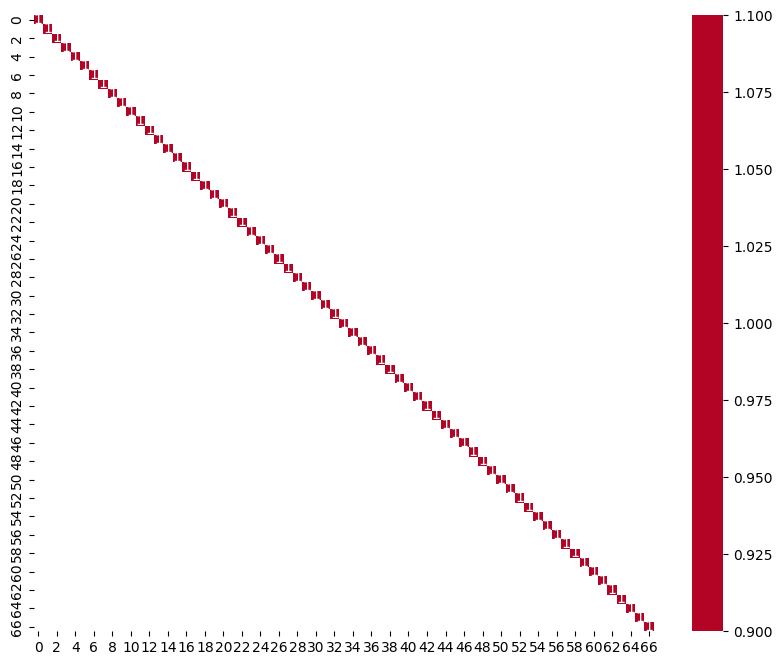

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_treshold = 0.5
filterred_correlation_matrix = corr_matrix[(corr_matrix > corr_treshold) | (corr_matrix < -corr_treshold)]
plt.figure(figsize=(10,8))
sns.heatmap(filterred_correlation_matrix, annot=True, cmap='coolwarm', center = 0)